## Prediksi Multivariat Harga Komoditas dan Kurs Rupiah dengan LSTM untuk Stabilitas Ekonomi



Oleh : <br>
Nama : Wahyu Rohmatul Abidin<br>
Nim  : 220411100198<br>
Kelas: Proyek Sains Data (D) <br>
projek 3


## 1. Bussiness Understanding


#### **a**. Latar Belakang
Fluktuasi harga komoditas seperti beras putih, bawang merah, serta kurs rupiah terhadap dolar, dan harga minyak memiliki dampak besar pada stabilitas ekonomi, baik di tingkat individu, bisnis, maupun pemerintah. Pemahaman terhadap pola perubahan harga dan prediksi yang akurat dapat membantu berbagai pemangku kepentingan (stakeholders) dalam mengambil keputusan yang lebih baik, seperti, Untuk menentukan kebijakan ekonomi atau stabilisasi harga, Sebagai dasar perencanaan pengadaan bahan baku atau manajemen risiko dan Untuk perencanaan keuangan rumah tangga, terutama dalam menghadapi kenaikan harga barang kebutuhan pokok.

#### b. Permasalahan Bisnis
<p>1. Bagaimana cara memprediksi perubahan harga komoditas (beras putih, bawang merah) dan kurs rupiah terhadap dolar dalam beberapa hari ke depan untuk mendukung pengambilan keputusan?</p>
<p>2. **Bagaimana** memanfaatkan prediksi ini untuk menjaga stabilitas ekonomi?</p>

#### c. Tujuan Proyek
<p>1.Stabilitas Ekonomi</p>
 Menyediakan alat bantu prediksi yang dapat digunakan pemerintah, pelaku usaha, dan individu untuk mengambil keputusan strategis demi menjaga stabilitas harga dan ekonomi.<br>
 <p>2. Prediksi Multivariate</p>
Mengembangkan model prediksi berbasis LSTM untuk memprediksi harga komoditas dan kurs rupiah terhadap dolar selama beberapa hari ke depan secara multivariat.




#### D. Dampak Bisnis
1. Membantu pemerintah dan pelaku usaha dalam membuat keputusan berbasis data.
<br>
2. Meningkatkan ketahanan ekonomi dengan prediksi akurat terhadap fluktuasi harga komoditas.


## 2 EDA

#### *2.1* Import Library

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import math
import seaborn as sns



# Mengabaikan peringatan TensorFlow
import warnings
warnings.filterwarnings("ignore")


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Proyek_sains_data/UAS/3_multistep_Mustivariate/dataMinyak.csv")

Dataset yang digunakan bersumber dari data bi.go.id


In [6]:
df = pd.DataFrame(data)
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d/%m/%Y')
df.set_index('tanggal', inplace=True)

#### 2.2 Dataset

In [8]:
df

,minyakGoreng,berasMedium,berasSuper,kursDolar
tanggal,,,,
2022-01-03,17900,11600,10500,14349.4
2022-01-04,17900,11600,10500,14341.4
2022-01-05,17900,11600,10500,14381.6
2022-01-06,17900,11650,10600,14436.8
2022-01-07,17900,11700,10600,14468.0
...,...,...,...,...
2024-09-05,17250,15300,14300,16021.7
2024-09-06,17250,15300,14300,15990.6
2024-09-09,17250,15300,14300,15943.3


Data yang digunakan menggunakan 4 fitur yaitu harga minyak, harga beras medium, harga beras super dan kurs rupiah terhadap nilai dolar. Data diambil per-hari dari january 2022 sampai september 2024.

In [15]:
#Melihat Dimensi Data
print(df.shape)

(703, 4)


In [16]:
# Rangkuman Statistika
print(df.describe())

       minyakGoreng   berasMedium    berasSuper     kursDolar
count    703.000000    703.000000    703.000000    703.000000
mean   18200.782361  13380.725462  12442.958748  15375.531721
std     1837.129740   1441.598773   1591.359614    551.780287
min    16900.000000  11600.000000  10100.000000  14341.400000
25%    17250.000000  11800.000000  10800.000000  14978.000000
50%    17700.000000  13250.000000  12350.000000  15442.800000
75%    17900.000000  14525.000000  13800.000000  15743.300000
max    24250.000000  15900.000000  15600.000000  16540.300000


In [22]:
#Memeriksa missing value
print(df.isnull().sum())

minyakGoreng    0
berasMedium     0
berasSuper      0
kursDolar       0
dtype: int64


#### 2.3 visualisasi Data

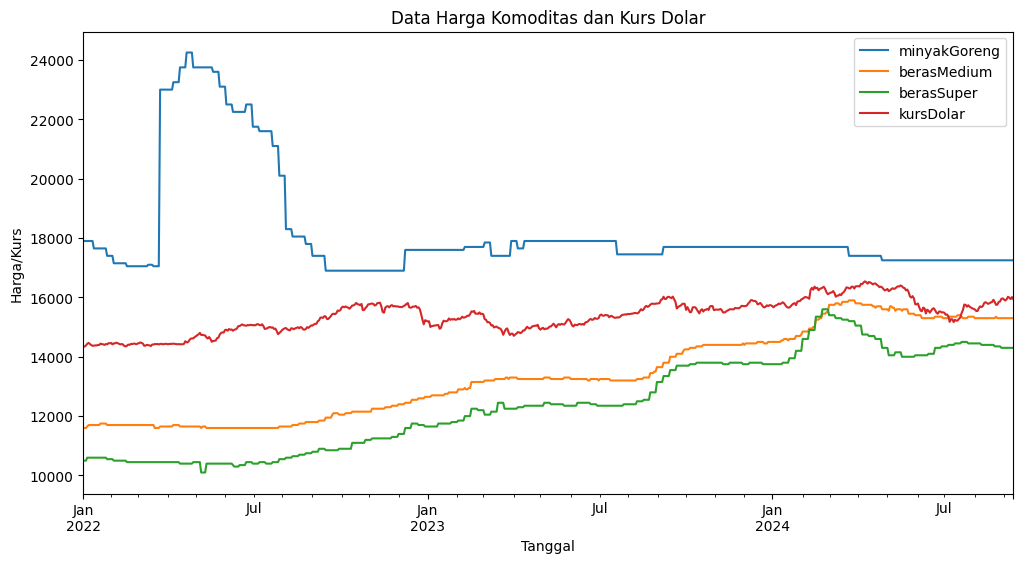

In [9]:
# Visualisasi awal data
df.plot(figsize=(12, 6), title="Data Harga Komoditas dan Kurs Dolar", xlabel="Tanggal", ylabel="Harga/Kurs")
plt.show()


#### 2.4 Korelasi antar variabel

In [23]:
correlation = df.corr()
print(correlation)

              minyakGoreng  berasMedium  berasSuper  kursDolar
minyakGoreng      1.000000    -0.456361   -0.470179  -0.460784
berasMedium      -0.456361     1.000000    0.986375   0.784479
berasSuper       -0.470179     0.986375    1.000000   0.794422
kursDolar        -0.460784     0.784479    0.794422   1.000000


Matriks korelasi adalah tabel yang menunjukkan hubungan linear (korelasi) antara variabel-variabel dalam dataset Anda.<br>
 Nilainya berkisar antara -1 hingga 1:

1 berarti hubungan positif sempurna: jika satu variabel meningkat, variabel lain juga meningkat secara proporsional.<br>
-1 berarti hubungan negatif sempurna: jika satu variabel meningkat, variabel lain menurun secara proporsional.<br>
0 berarti tidak ada hubungan linear.

Agar lebih mudah dipahami bisa diliha pada tabel dibawah ini

<Axes: >

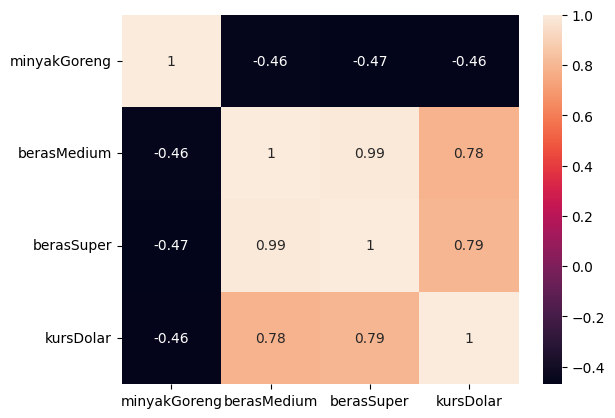

In [24]:
sns.heatmap(correlation, annot=True)

dari visualisasi diatas bisa kita lihar bahwa : <br>
1. Minyak goreng : memiliki korelasi dengan beras Medium , Beras Super, dan Kurs Dolar bernilai negatif dengan rata - 0.45 yang  menunjukkkan bahwa  mempunyai hubungan negatif sedang yang berarti jika harga minyak goreng naik maka harga beras dan nilai dolar cenderung turun atau sebaliknya. <br>
2. Beras super : memiliki korelasi yang tinggi atau sangat kua dengan harga beras medium maupun nilai rupiah yaitu 0.99 dan dan0,79 yang berarti menunjukkan bahwa perubahan harga beras super sejalan dengan perubahan harga beras medium dan nilai kurs rupiah.

## 3. Preprocessing data

#### 3.1 Normalisasi Data

In [25]:
# Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

#### 3.2 Split Data

In [26]:
# Split Data Training dan Testing
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


#### 3.3 Membuat Dataset LSTM

In [32]:
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [33]:

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

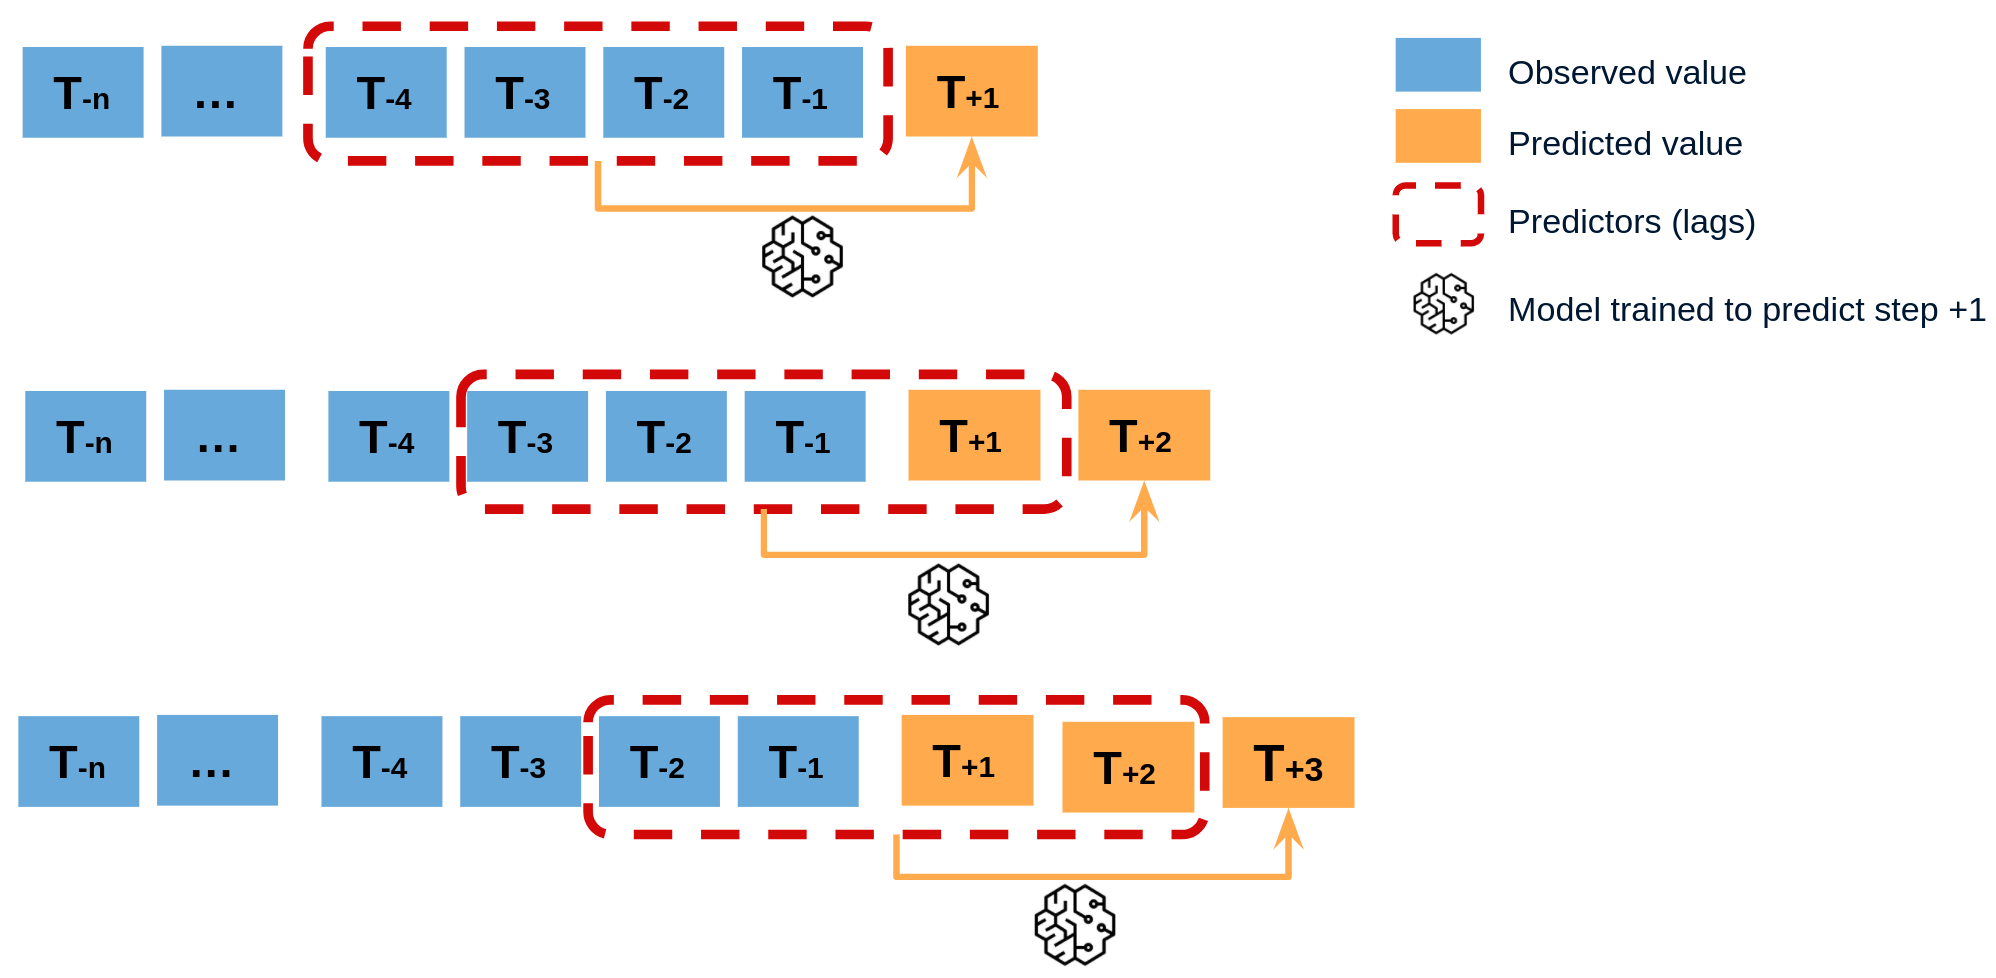

Dalam forecasting multistep ini menggunakan konsep recursif multistep  di mana prediksi untuk langkah waktu berikutnya dibuat secara berurutan, menggunakan hasil prediksi sebelumnya sebagai input untuk prediksi selanjutnya

In [34]:
X_train.shape

(547, 15, 4)

In [35]:
# Reshape untuk LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


## 4. Modelling

#### 4.1 Model LSTM

In [36]:
# Model LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(X_train.shape[2])  # Output harus sesuai dengan jumlah variabel
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 15, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,579 (127.26 KB)

 Trainable params: 32,579 (127.26 KB)

 Non-trainable params: 0 (0.00 B)

model neural network berbasis LSTM (Long Short-Term Memory) yang terdiri dari empat lapisan. Lapisan pertama adalah LSTM dengan ukuran input 15 (panjang time step) dan menghasilkan 50 unit output, yang memiliki 11.000 parameter yang dapat dilatih. Lapisan kedua adalah LSTM dengan 50 unit output, yang terhubung dari lapisan sebelumnya dan memiliki 20.200 parameter. Setelah itu, terdapat lapisan Dense dengan 25 neuron yang bertugas untuk mereduksi dimensi dan meneruskan informasi, dengan 1.275 parameter. Lapisan terakhir adalah Dense dengan 4 unit output, yang sesuai dengan jumlah variabel yang diprediksi, seperti minyak goreng, beras medium, beras super, dan kurs rupiah, memiliki 104 parameter. Secara keseluruhan, model ini memiliki 32.579 parameter, semuanya dapat dilatih untuk memprediksi nilai keluaran berdasarkan data masukan. Model ini dirancang untuk menangani data sekuensial dengan fokus pada hubungan temporal antar variabel.

#### 4.2 Training

In [37]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, batch_size=1, epochs=50, verbose=1)

Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0116
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0033
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0024
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0021
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0017
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0015
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0010
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0010
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0012
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0011
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0019
Epoch 12/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 8.6040e-04
Epoch 13/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0010
Epoch 14/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.9364e-04
Epoch 15/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 6

## 5. Prediksi

In [38]:
# Prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


#### 5.1 Nilai MAPE dan RMSE

### Nilai RMSE
RMSE mengukur seberapa dekat hasil prediksi model dengan nilai sebenarnya. Rumus RMSE adalah :<br>
RMSE mengukur seberapa besar rata-rata kesalahan antara prediksi dan nilai aktual dalam satuan yang sama dengan data aslinya. RMSE lebih sensitif terhadap kesalahan besar karena setiap selisih antara nilai aktual dan prediksi dikuadratkan
<center>$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}'$</center>

### Nilai MAPE
</br>
MAPE mengukur kesalahan rata-rata dalam bentuk persentase. MAPE sangat berguna ketika ingin mengetahui persentase kesalahan prediksi rata-rata, tetapi sensitif terhadap nilai aktual kecil karena menyebabkan kesalahan besar jika nilai prediksi mendekati nol. <br>
<center>$MAPE = \frac{1}{n}\sum_{i=1}^n(\frac{|y_i -\hat{y}_i|}{y_i})\cdot100$</center>


In [39]:
# Inverse Transform
train_predict_rescaled = scaler.inverse_transform(train_predict)
test_predict_rescaled = scaler.inverse_transform(test_predict)
y_train_rescaled = scaler.inverse_transform(y_train)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluasi
rmse = math.sqrt(mean_squared_error(y_test_rescaled, test_predict_rescaled))
mape = mean_absolute_percentage_error(y_test_rescaled, test_predict_rescaled)
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")


RMSE: 197.07
MAPE: 1.05%


1.  Nilai RMSE sebesar 194.39 menunjukkan bahwa rata-rata kesalahan prediksi model adalah sekitar Rp194. Semakin kecil nilai RMSE, semakin baik model dalam melakukan prediksi <br>
2. Nilai MAPE sebesar 1.05 % menunjukkan bahwa rata-rata kesalahan prediksi model hanya sekitar 1.05% dari nilai aktual. Nilai ini menunjukkan performa model yang sangat baik, karena kesalahan prediksi berada di sekitar 1%.



#### 5.2 Visualisasi data

#### 5.1 Minyak Goreng

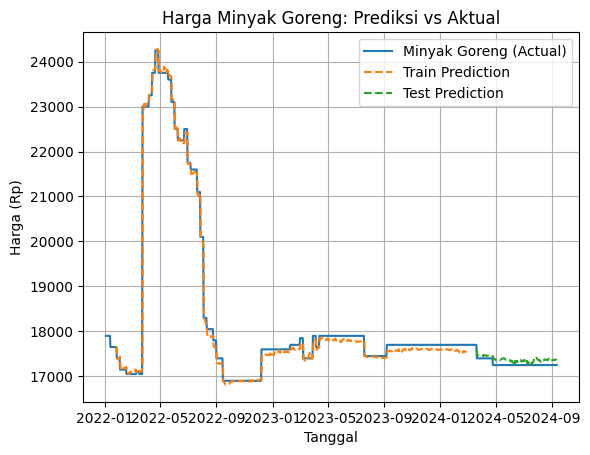

In [ ]:
# Plot Data Asli
plt.plot(df.index, scaler.inverse_transform(scaled_data)[:, 0], label="Minyak Goreng (Actual)")

# Sesuaikan Train Index dan Plot Train Prediction
train_index = df.index[time_step:time_step + len(train_predict_rescaled)]  # Cocokkan panjang dengan train_predict_rescaled
plt.plot(train_index, train_predict_rescaled[:, 0], label="Train Prediction", linestyle="dashed")

# Sesuaikan Test Index dan Plot Test Prediction
test_index = df.index[train_size + time_step:train_size + time_step + len(test_predict_rescaled)]  # Cocokkan panjang dengan test_predict_rescaled
plt.plot(test_index, test_predict_rescaled[:, 0], label="Test Prediction", linestyle="dashed")

# Tambahkan Label dan Visualisasi
plt.title("Harga Minyak Goreng: Prediksi vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Harga (Rp)")
plt.legend()
plt.grid(True)
plt.show()


#### 5.2 Beras Medium

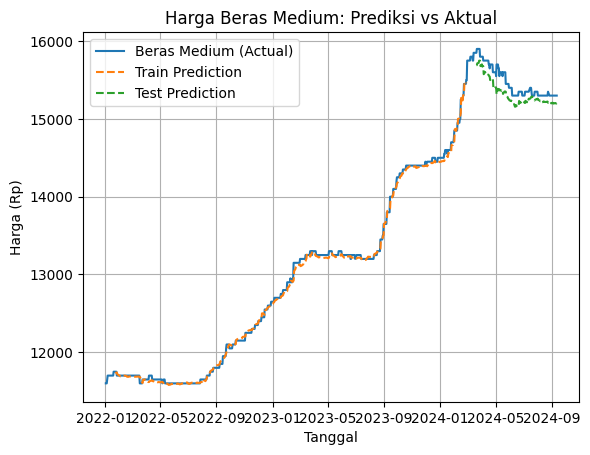

In [42]:
# Plot Data Asli
plt.plot(df.index, scaler.inverse_transform(scaled_data)[:, 1], label="Beras Medium (Actual)")

# Sesuaikan Train Index dan Plot Train Prediction
train_index = df.index[time_step:time_step + len(train_predict_rescaled)]  # Cocokkan panjang dengan train_predict_rescaled
plt.plot(train_index, train_predict_rescaled[:, 1], label="Train Prediction", linestyle="dashed")

# Sesuaikan Test Index dan Plot Test Prediction
test_index = df.index[train_size + time_step:train_size + time_step + len(test_predict_rescaled)]  # Cocokkan panjang dengan test_predict_rescaled
plt.plot(test_index, test_predict_rescaled[:, 1], label="Test Prediction", linestyle="dashed")

# Tambahkan Label dan Visualisasi
plt.title("Harga Beras Medium: Prediksi vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Harga (Rp)")
plt.legend()
plt.grid(True)
plt.show()


#### 5.2 Beras Super

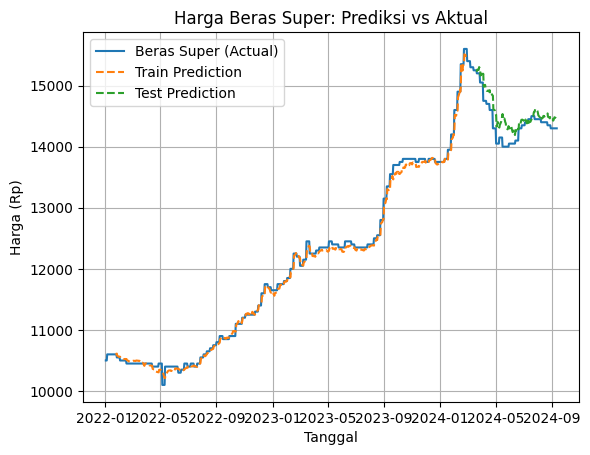

In [45]:
# Plot Data Asli
plt.plot(df.index, scaler.inverse_transform(scaled_data)[:, 2], label="Beras Super (Actual)")

# Sesuaikan Train Index dan Plot Train Prediction
train_index = df.index[time_step:time_step + len(train_predict_rescaled)]  # Cocokkan panjang dengan train_predict_rescaled
plt.plot(train_index, train_predict_rescaled[:, 2], label="Train Prediction", linestyle="dashed")

# Sesuaikan Test Index dan Plot Test Prediction
test_index = df.index[train_size + time_step:train_size + time_step + len(test_predict_rescaled)]  # Cocokkan panjang dengan test_predict_rescaled
plt.plot(test_index, test_predict_rescaled[:, 2], label="Test Prediction", linestyle="dashed")

# Tambahkan Label dan Visualisasi
plt.title("Harga Beras Super: Prediksi vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Harga (Rp)")
plt.legend()
plt.grid(True)
plt.show()


#### 5.2 Nilai Kurs Rupiah

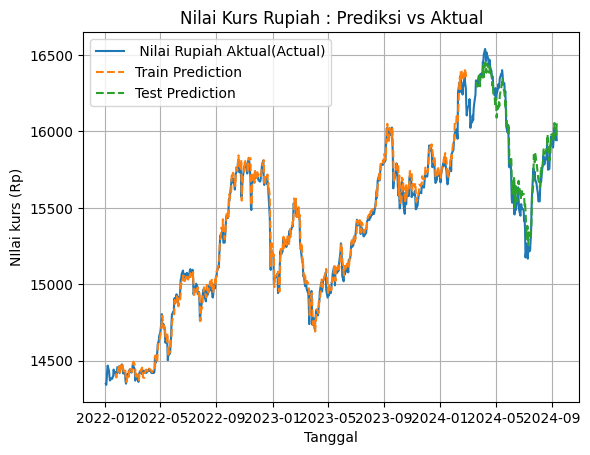

In [46]:
# Plot Data Asli
plt.plot(df.index, scaler.inverse_transform(scaled_data)[:, 3], label=" Nilai Rupiah Aktual(Actual)")

# Sesuaikan Train Index dan Plot Train Prediction
train_index = df.index[time_step:time_step + len(train_predict_rescaled)]  # Cocokkan panjang dengan train_predict_rescaled
plt.plot(train_index, train_predict_rescaled[:, 3], label="Train Prediction", linestyle="dashed")

# Sesuaikan Test Index dan Plot Test Prediction
test_index = df.index[train_size + time_step:train_size + time_step + len(test_predict_rescaled)]  # Cocokkan panjang dengan test_predict_rescaled
plt.plot(test_index, test_predict_rescaled[:, 3], label="Test Prediction", linestyle="dashed")

# Tambahkan Label dan Visualisasi
plt.title("Nilai Kurs Rupiah : Prediksi vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("NIlai kurs (Rp)")
plt.legend()
plt.grid(True)
plt.show()


## 6. Download Model

In [ ]:
from google.colab import files
model.save('my_model.h5')
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 7. Deployment hugging face